# Project Title: Exploratory Data Analysis on Population Estimates and Projections(Src:World Bank Open Data)
## Overview
 The project based on population estimates and projections gives a brief data analysis of the world population its various trends and aspects both statistcally and visually. The primary focus of the project is to have clear estimation & projection of the population till 2050 and understand global population trends over the specified time period.
## Introduction
 The project database presents population and other demographic estimates and projections from 1960 to 2050, covering more than 200 economies. It includes population data by various age groups, sex, urban/rural, fertility data, mortality data, and migration data.
### Objectives
 -Clear projection of the population till 2050.
 
 -Understand global population trends over the specified time period.
 
 -Analyze demographic shifts in different regions and countries.
 
 -Explore the impact of migration on population changes.
 
 -Identify patterns in fertility and mortality rates.

started at 1/07/2024 - 1/11/2024

In [1]:
#importing different libraries for data cleaning,visualization,exploration 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.float_format', lambda x: f'{x:.2f}') # format the display of floating-point numbers within a DataFrame

# Data Reading

In [6]:
#loading the dataset from the computer
df1 = pd.read_csv(r"C:\Users\SUSHANT LIMBU\Portfolio project\Job Portfolio Projects\Exploratory Data Analysis (EDA)\Population-EstimatesCountry.csv")
df2 = pd.read_csv(r"C:\Users\SUSHANT LIMBU\Portfolio project\Job Portfolio Projects\Exploratory Data Analysis (EDA)\Population-EstimatesCountry-Series.csv")
df3 = pd.read_csv(r"C:\Users\SUSHANT LIMBU\Portfolio project\Job Portfolio Projects\Exploratory Data Analysis (EDA)\Population-EstimatesData.csv")
df4 = pd.read_csv(r"C:\Users\SUSHANT LIMBU\Portfolio project\Job Portfolio Projects\Exploratory Data Analysis (EDA)\Population-EstimatesFootNote.csv")
df5 = pd.read_csv(r"C:\Users\SUSHANT LIMBU\Portfolio project\Job Portfolio Projects\Exploratory Data Analysis (EDA)\Population-EstimatesSeries.csv")


# Data Cleaning


In [11]:
#deleting unwanted column from the dataframe
df1 = df1.drop(df1.columns[[2,6,9,10,11,12,13,14,15,16,17,18,20,21,22,26,27,28,29,30]], axis=1)
df2 = df2.drop(df2.columns[[2,3]], axis=1)
df3 = df3.drop(df3.columns[[95]], axis=1)
df4 = df4.drop(df4.columns[[4]], axis=1)
df5 = df5.drop(df5.columns[[1,3,4,5,7,8,10,11,12,13,14,15,16,17,18,19,20]], axis=1)

In [17]:
#deleting the unwanted,wrong,duplicate and null datas from the dataframe
df1 = df1.dropna(subset=["Country Code","2-alpha code","Currency Unit","Income Group","Latest population census"])
df2 = df2.drop_duplicates()
df3 = df3.drop(df3.index[:9260 + 1])
df3 = df3.dropna(subset=["2019"])
df4 = df4.drop_duplicates()
df5 = df5.drop_duplicates()

In [22]:
#extracting only the data from the dataframe
columns_to_extract = df1.columns[8:]#other column index 10,9 were also extracted
for column in columns_to_extract:
    df1[column] = df1[column].str.extract('(\d+)').astype('Int64')
columns = ['Year']
for column in columns:
    df4[column] = df4[column].str.extract('(\d+)').astype('Int64')

In [28]:
#renaming the columns of the dataframe
df1 = df1.rename(columns={'Short Name':'Country Name','Long Name':'Official Name','Currency Unit':'Currency','External debt Reporting status':'External Debt Status','Source of most recent Income and expenditure data':'Latest Income and Expenditure data'})
df2 = df2.rename(columns={'CountryCode':'Country Code','SeriesCode':'Indicator Code'})
df4 = df4.rename(columns={'CountryCode':'Country Code','SeriesCode':'Indicator Code'})
df5 = df5.rename(columns={'Series Code':'Indicator Code'})

#reindexing the index of a dataframe
df3 = df3.reset_index(drop=True)

# Explanatory Data Analysis

In [29]:
#display the first few rows of a DataFrame
df3.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
0,Afghanistan,AFG,Age dependency ratio (% of working-age populat...,SP.POP.DPND,80.05,80.22,80.40,80.72,81.22,81.99,...,62.16,61.18,60.26,59.38,58.55,57.77,57.02,56.30,55.62,55.00
1,Afghanistan,AFG,"Age dependency ratio, old",SP.POP.DPND.OL,5.10,5.08,5.05,5.02,5.00,4.99,...,5.51,5.61,5.71,5.81,5.91,6.01,6.11,6.21,6.32,6.44
2,Afghanistan,AFG,"Age dependency ratio, young",SP.POP.DPND.YG,74.95,75.14,75.35,75.69,76.22,77.01,...,56.66,55.58,54.55,53.58,52.64,51.76,50.90,50.08,49.30,48.55
3,Afghanistan,AFG,"Age population, age 00, female, interpolated",SP.POP.AG00.FE.IN,178344.50,182752.00,187399.50,192326.50,197478.00,202707.00,...,762064.00,766177.50,769821.50,773640.00,777643.50,780763.50,782955.50,783890.00,785028.50,786252.50
4,Afghanistan,AFG,"Age population, age 00, male, interpolated",SP.POP.AG00.MA.IN,182281.00,186893.50,191763.00,196892.00,202281.00,207791.50,...,792518.00,796769.50,800451.50,804351.50,808510.50,811745.50,814070.50,814991.50,816164.50,817395.50


In [30]:
#Selecting all rows with certain indicator code from the column 
selected_rows = df3[df3['Indicator Code'] == 'SP.POP.TOTL']
df6 = selected_rows
df6 = df6.reset_index(drop=True)

In [32]:
#dropping all rows with null values
df7 = df6.dropna()
df7

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
0,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8622466.00,8790140.00,8969047.00,9157465.00,9355514.00,9565147.00,...,63375847.00,64572473.00,65768823.00,66964990.00,68161269.00,69355671.00,70546052.00,71729374.00,72905780.00,74075234.00
1,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.00,1659800.00,1711319.00,1762621.00,1814135.00,1864791.00,...,2566102.00,2546974.00,2527255.00,2507018.00,2486318.00,2465215.00,2443792.00,2422078.00,2400114.00,2377598.00
2,Algeria,DZA,"Population, total",SP.POP.TOTL,11394307.00,11598608.00,11778260.00,11969451.00,12179099.00,12381256.00,...,55440658.00,55965060.00,56488986.00,57012291.00,57533658.00,58050507.00,58559198.00,59055401.00,59535713.00,60001113.00
3,American Samoa,ASM,"Population, total",SP.POP.TOTL,20085.00,20626.00,21272.00,21949.00,22656.00,23391.00,...,36512.00,36139.00,35780.00,35434.00,35101.00,34784.00,34481.00,34178.00,33868.00,33557.00
4,Andorra,AND,"Population, total",SP.POP.TOTL,9443.00,10216.00,11014.00,11839.00,12690.00,13563.00,...,82169.00,82103.00,82010.00,81888.00,81739.00,81558.00,81347.00,81099.00,80817.00,80504.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,Viet Nam,VNM,"Population, total",SP.POP.TOTL,32718461.00,33621982.00,34533889.00,35526727.00,36509166.00,37466077.00,...,106080557.00,106252410.00,106406496.00,106544934.00,106667721.00,106773162.00,106860645.00,106930754.00,106982197.00,107012939.00
212,Virgin Islands (U.S.),VIR,"Population, total",SP.POP.TOTL,32500.00,34300.00,35000.00,39800.00,40800.00,43500.00,...,90189.00,89398.00,88601.00,87801.00,86994.00,86177.00,85346.00,84509.00,83659.00,82792.00
214,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5542459.00,5646668.00,5753386.00,5860197.00,5973803.00,6097298.00,...,48571507.00,49345776.00,50117967.00,50885281.00,51644122.00,52395228.00,53136711.00,53866133.00,54585033.00,55296331.00
215,Zambia,ZMB,"Population, total",SP.POP.TOTL,3119430.00,3219451.00,3323427.00,3431381.00,3542764.00,3658024.00,...,31615986.00,32260579.00,32906910.00,33554740.00,34204865.00,34857072.00,35510018.00,36162890.00,36813065.00,37460435.00


In [256]:
#transposing data for easier data plotting
data = df7.sum()
data = pd.DataFrame(data)
data = data.transpose()

In [321]:
#changing the data ensure data is in numeric format
column_to_change =['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023', '2024', '2025', '2026', '2027', '2028', '2029', '2030', '2031',
       '2032', '2033', '2034', '2035', '2036', '2037', '2038', '2039', '2040',
       '2041', '2042', '2043', '2044', '2045', '2046', '2047', '2048', '2049',
       '2050']
data[column_to_change] = data[column_to_change].astype(float)

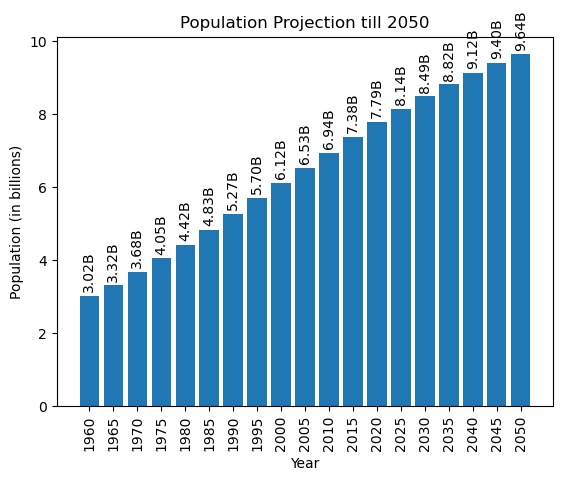

In [287]:
columns_to_plot = ['1960','1965','1970','1975','1980','1985','1990','1995','2000','2005','2010','2015','2020','2025','2030','2035','2040','2045','2050']
# Dividing the data by 1 billion
data_in_billions = data[columns_to_plot] / 1e9

# Plotting the graph
plt.bar(data_in_billions.columns, data_in_billions.iloc[0])

# Adding data labels to the bars
for i, value in enumerate(data_in_billions.iloc[0]):
    plt.text(i, value + 0.1, f'{value:.2f}B', ha='center', va='bottom',rotation='vertical')

# Adjusting the axis label
plt.title('Population Projection till 2050')
plt.xlabel('Year')
plt.ylabel('Population (in billions)')
plt.xticks(rotation='vertical')
# Showing the plot
plt.show()


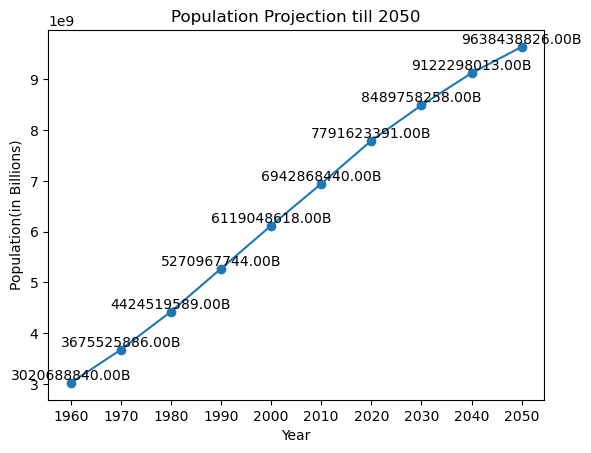

In [288]:
columns_to_plot = ['1960', '1970', '1980', '1990', '2000', '2010', '2020', '2030', '2040', '2050']

data_to_plot = data[columns_to_plot].astype(float)  # Ensure data is in numeric format

# Plotting the graph
plt.plot(data_to_plot.columns, data_to_plot.iloc[0],marker='o')

# Adding data labels to the bars
for i, value in enumerate(data_to_plot.iloc[0]):
    plt.text(i, value + 0.1, f'{value:.2f}B', ha='center', va='bottom',rotation='horizontal')
# Adjusting the axis label
plt.xlabel('Year')
plt.ylabel('Population(in Billions)')
plt.title('Population Projection till 2050')
plt.show()

In [36]:
#display the first few rows of a DataFrame
df3.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
0,Afghanistan,AFG,Age dependency ratio (% of working-age populat...,SP.POP.DPND,80.05,80.22,80.40,80.72,81.22,81.99,...,62.16,61.18,60.26,59.38,58.55,57.77,57.02,56.30,55.62,55.00
1,Afghanistan,AFG,"Age dependency ratio, old",SP.POP.DPND.OL,5.10,5.08,5.05,5.02,5.00,4.99,...,5.51,5.61,5.71,5.81,5.91,6.01,6.11,6.21,6.32,6.44
2,Afghanistan,AFG,"Age dependency ratio, young",SP.POP.DPND.YG,74.95,75.14,75.35,75.69,76.22,77.01,...,56.66,55.58,54.55,53.58,52.64,51.76,50.90,50.08,49.30,48.55
3,Afghanistan,AFG,"Age population, age 00, female, interpolated",SP.POP.AG00.FE.IN,178344.50,182752.00,187399.50,192326.50,197478.00,202707.00,...,762064.00,766177.50,769821.50,773640.00,777643.50,780763.50,782955.50,783890.00,785028.50,786252.50
4,Afghanistan,AFG,"Age population, age 00, male, interpolated",SP.POP.AG00.MA.IN,182281.00,186893.50,191763.00,196892.00,202281.00,207791.50,...,792518.00,796769.50,800451.50,804351.50,808510.50,811745.50,814070.50,814991.50,816164.50,817395.50


In [128]:
#creating a new dataframe grouprd by Region with Income group
region = df1.groupby('Region')
income_group  = region["Income Group"].describe()
income_group

,count,unique,top,freq
Region,,,,
East Asia & Pacific,37,4,High income,14
Europe & Central Asia,57,3,High income,37
Latin America & Caribbean,40,3,Upper middle income,19
Middle East & North Africa,21,4,High income,8
North America,3,1,High income,3
South Asia,8,3,Lower middle income,6
Sub-Saharan Africa,45,4,Low income,20


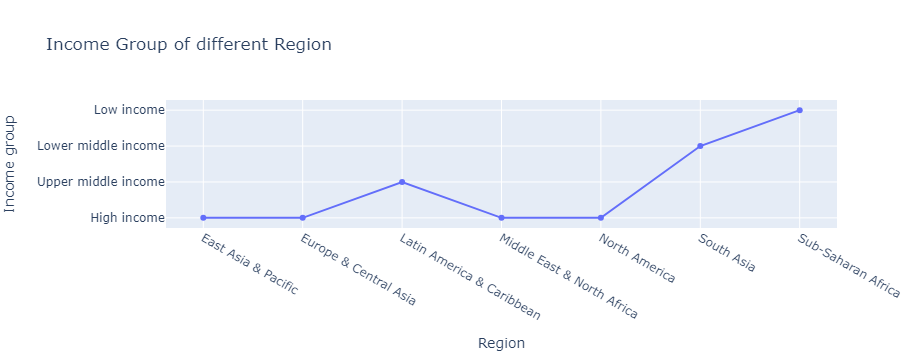

In [289]:
import plotly.express as px
import pandas as pd
# Creating a line plot with a slider for the Year
fig = px.line(income_group, x=income_group.index, y='top', title='Income Group of different Region', markers=True,
              labels={'top': 'Income group', 'Region': 'Region'})
# Showing the plot
fig.show()


In [38]:
#display the first few rows of a DataFrame
df1.head()

,Country Code,Country Name,Official Name,2-alpha code,Currency,Region,Income Group,External Debt Status,Latest population census,Latest household survey,Latest Income and Expenditure data
0,ABW,Aruba,Aruba,AW,Aruban florin,Latin America & Caribbean,High income,NaN,2020,<NA>,<NA>
2,AFG,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,South Asia,Low income,Estimate,1979,2015,2016
4,AGO,Angola,People's Republic of Angola,AO,Angolan kwanza,Sub-Saharan Africa,Lower middle income,Actual,2014,2015,2008
5,ALB,Albania,Republic of Albania,AL,Albanian lek,Europe & Central Asia,Upper middle income,Actual,2020,2017,2012
6,AND,Andorra,Principality of Andorra,AD,Euro,Europe & Central Asia,High income,NaN,2011,<NA>,<NA>


In [152]:
#Selecting all rows with certain indicator code from the column
selected_rows2 = df3[df3['Indicator Code'] == 'SP.DYN.TFRT.IN']
selected_rows2

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
57,Afghanistan,AFG,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,7.28,7.28,7.29,7.30,7.30,7.30,7.32,7.34,7.36,7.39,7.40,7.43,7.45,7.49,7.53,7.54,7.56,7.59,7.60,7.61,7.59,7.57,7.55,7.54,7.51,7.52,7.52,7.53,7.53,7.53,7.57,7.61,7.67,7.72,7.72,7.71,7.71,7.67,7.64,7.60,7.53,7.45,7.34,7.22,7.07,6.91,6.72,6.53,6.38,6.24,6.10,5.96,5.83,5.70,5.56,5.41,5.26,5.13,5.00,4.87,4.75,4.64,NaN,NaN,NaN,4.18,NaN,NaN,NaN,NaN,3.73,NaN,NaN,NaN,NaN,3.34,NaN,NaN,NaN,NaN,3.06,NaN,NaN,NaN,NaN,2.82,NaN,NaN,NaN,NaN,2.62
244,Albania,ALB,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.46,6.35,6.21,6.05,5.85,5.62,5.46,5.40,5.34,5.26,5.11,5.01,4.90,4.76,4.64,4.52,4.34,4.14,3.95,3.76,3.61,3.51,3.45,3.36,3.30,3.21,3.12,3.06,3.00,2.94,2.90,2.83,2.77,2.71,2.71,2.69,2.62,2.50,2.40,2.32,2.23,2.15,2.04,1.98,1.89,1.80,1.72,1.67,1.65,1.65,1.66,1.67,1.69,1.70,1.67,1.61,1.55,1.49,1.44,1.41,1.40,1.39,NaN,NaN,NaN,1.38,NaN,NaN,NaN,NaN,1.39,NaN,NaN,NaN,NaN,1.42,NaN,NaN,NaN,NaN,1.44,NaN,NaN,NaN,NaN,1.45,NaN,NaN,NaN,NaN,1.47
431,Algeria,DZA,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,7.50,7.56,7.61,7.65,7.67,7.68,7.67,7.67,7.66,7.65,7.63,7.60,7.55,7.49,7.44,7.37,7.31,7.23,7.14,7.06,6.95,6.81,6.63,6.44,6.22,5.97,5.62,5.33,5.06,4.83,4.56,4.39,4.26,4.06,3.85,3.46,3.14,2.90,2.71,2.62,2.57,2.51,2.46,2.48,2.51,2.56,2.60,2.68,2.75,2.81,2.84,2.88,2.96,2.96,3.00,3.04,3.05,3.05,3.02,2.99,2.94,2.89,NaN,NaN,NaN,2.66,NaN,NaN,NaN,NaN,2.44,NaN,NaN,NaN,NaN,2.28,NaN,NaN,NaN,NaN,2.16,NaN,NaN,NaN,NaN,2.08,NaN,NaN,NaN,NaN,2.01
954,Angola,AGO,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.71,6.79,6.87,6.95,7.04,7.12,7.19,7.27,7.33,7.39,7.43,7.47,7.49,7.50,7.50,7.49,7.49,7.47,7.47,7.46,7.46,7.46,7.46,7.46,7.46,7.45,7.43,7.41,7.37,7.33,7.27,7.21,7.14,7.07,6.99,6.92,6.85,6.79,6.73,6.68,6.64,6.60,6.57,6.53,6.50,6.46,6.42,6.37,6.32,6.26,6.19,6.12,6.04,5.95,5.86,5.77,5.69,5.60,5.52,5.44,5.37,5.30,NaN,NaN,NaN,4.95,NaN,NaN,NaN,NaN,4.54,NaN,NaN,NaN,NaN,4.13,NaN,NaN,NaN,NaN,3.76,NaN,NaN,NaN,NaN,3.43,NaN,NaN,NaN,NaN,3.17
1141,Antigua and Barbuda,ATG,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,4.60,4.56,4.55,4.54,4.48,4.42,4.32,4.18,4.01,3.83,3.63,3.46,3.29,3.13,2.93,2.77,2.78,2.78,2.57,2.63,2.31,2.17,2.09,2.12,2.04,2.15,2.03,2.07,2.13,2.20,2.25,2.04,2.13,2.04,2.07,2.16,2.27,2.19,2.02,1.96,2.20,2.02,1.94,1.89,1.85,1.83,1.83,1.86,2.04,2.01,1.78,1.75,1.66,1.54,1.53,1.57,1.46,1.49,1.37,1.47,1.57,1.58,NaN,NaN,NaN,1.58,NaN,NaN,NaN,NaN,1.58,NaN,NaN,NaN,NaN,1.58,NaN,NaN,NaN,NaN,1.58,NaN,NaN,NaN,NaN,1.59,NaN,NaN,NaN,NaN,1.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39138,Virgin Islands (U.S.),VIR,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,5.45,4.89,4.93,4.65,5.02,5.11,4.57,4.87,4.74,4.67,5.13,4.90,4.64,4.14,3.86,3.63,3.42,3.27,3.30,3.02,3.09,2.89,2.95,3.00,2.85,2.82,2.74,2.85,2.80,2.95,2.99,3.10,3.20,3.10,3.04,2.72,2.56,2.73,2.50,2.38,2.06,1.90,2.21,2.07,2.17,2.24,2.03,2.51,2.44,2.37,2.30,2.16,2.06,2.08,2.09,2.11,2.09,2.08,2.06,2.05,2.03,2.01,NaN,NaN,NaN,2.08,NaN,NaN,NaN,NaN,2.01,NaN,NaN,NaN,NaN,1.95,NaN,NaN,NaN,NaN,1.92,NaN,NaN,NaN,NaN,1.89,NaN,NaN,NaN,NaN,1.85
39301,West Bank and Gaza,PSE,"Fertili

In [153]:
#merging to dataframe to create a new one
merged_df = pd.merge(df1,selected_rows2,on='Country Name')
merged_df

,Country Code_x,Country Name,Official Name,2-alpha code,Currency,Region,Income Group,External Debt Status,Latest population census,Latest household survey,Latest Income and Expenditure data,Country Code_y,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
0,ABW,Aruba,Aruba,AW,Aruban florin,Latin America & Caribbean,High income,NaN,2020,<NA>,<NA>,ABW,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,4.82,4.66,4.47,4.27,4.06,3.84,3.62,3.42,3.23,3.05,2.91,2.79,2.69,2.61,2.55,2.51,2.47,2.45,2.42,2.41,2.39,2.38,2.36,2.35,2.34,2.33,2.32,2.31,2.29,2.27,2.30,2.31,2.28,2.23,2.12,2.19,2.15,2.14,1.96,1.87,1.90,1.83,1.76,1.75,1.68,1.78,1.91,1.93,1.94,1.92,1.94,1.96,2.03,2.12,2.15,1.97,1.95,1.84,1.59,1.49,1.32,1.18,NaN,NaN,NaN,1.19,NaN,NaN,NaN,NaN,1.23,NaN,NaN,NaN,NaN,1.27,NaN,NaN,NaN,NaN,1.31,NaN,NaN,NaN,NaN,1.34,NaN,NaN,NaN,NaN,1.37
1,AFG,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,South Asia,Low income,Estimate,1979,2015,2016,AFG,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,7.28,7.28,7.29,7.30,7.30,7.30,7.32,7.34,7.36,7.39,7.40,7.43,7.45,7.49,7.53,7.54,7.56,7.59,7.60,7.61,7.59,7.57,7.55,7.54,7.51,7.52,7.52,7.53,7.53,7.53,7.57,7.61,7.67,7.72,7.72,7.71,7.71,7.67,7.64,7.60,7.53,7.45,7.34,7.22,7.07,6.91,6.72,6.53,6.38,6.24,6.10,5.96,5.83,5.70,5.56,5.41,5.26,5.13,5.00,4.87,4.75,4.64,NaN,NaN,NaN,4.18,NaN,NaN,NaN,NaN,3.73,NaN,NaN,NaN,NaN,3.34,NaN,NaN,NaN,NaN,3.06,NaN,NaN,NaN,NaN,2.82,NaN,NaN,NaN,NaN,2.62
2,AGO,Angola,People's Republic of Angola,AO,Angolan kwanza,Sub-Saharan Africa,Lower middle income,Actual,2014,2015,2008,AGO,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.71,6.79,6.87,6.95,7.04,7.12,7.19,7.27,7.33,7.39,7.43,7.47,7.49,7.50,7.50,7.49,7.49,7.47,7.47,7.46,7.46,7.46,7.46,7.46,7.46,7.45,7.43,7.41,7.37,7.33,7.27,7.21,7.14,7.07,6.99,6.92,6.85,6.79,6.73,6.68,6.64,6.60,6.57,6.53,6.50,6.46,6.42,6.37,6.32,6.26,6.19,6.12,6.04,5.95,5.86,5.77,5.69,5.60,5.52,5.44,5.37,5.30,NaN,NaN,NaN,4.95,NaN,NaN,NaN,NaN,4.54,NaN,NaN,NaN,NaN,4.13,NaN,NaN,NaN,NaN,3.76,NaN,NaN,NaN,NaN,3.43,NaN,NaN,NaN,NaN,3.17
3,ALB,Albania,Republic of Albania,AL,Albanian lek,Europe & Central Asia,Upper middle income,Actual,2020,2017,2012,ALB,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.46,6.35,6.21,6.05,5.85,5.62,5.46,5.40,5.34,5.26,5.11,5.01,4.90,4.76,4.64,4.52,4.34,4.14,3.95,3.76,3.61,3.51,3.45,3.36,3.30,3.21,3.12,3.06,3.00,2.94,2.90,2.83,2.77,2.71,2.71,2.69,2.62,2.50,2.40,2.32,2.23,2.15,2.04,1.98,1.89,1.80,1.72,1.67,1.65,1.65,1.66,1.67,1.69,1.70,1.67,1.61,1.55,1.49,1.44,1.41,1.40,1.39,NaN,NaN,NaN,1.38,NaN,NaN,NaN,NaN,1.39,NaN,NaN,NaN,NaN,1.42,NaN,NaN,NaN,NaN,1.44,NaN,NaN,NaN,NaN,1.45,NaN,NaN,NaN,NaN,1.47
4,ARE,United Arab Emirates,United Arab Emirates,AE,U.A.E. dirham,Middle East & North Africa,High income,NaN,2020,2003,<NA>,ARE,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.72,6.68,6.66,6.62,6.57,6.52,6.49,6.49,6.50,6.49,6.49,6.47,6.45,6.40,6.33,6.26,6.21,6.16,6.09,6.03,5.95,5.81,5.65,5.48,5.31,5.13,5.01,4.90,4.79,4.67,4.54,4.25,4.09,3.82,3.77,3.27,3.23,3.06,2.91,2.79,2.73,2.62,2.54,2.49,2.38,2.20,2.07,1.99,1.92,1.85,1.79,1.72,1.67,1.60,1.54,1.49,1.44,1.42,1.36,1.33,1.46,1.46,NaN,NaN,NaN,1.44,NaN,NaN,NaN,NaN,1.44,NaN,NaN,NaN,NaN,1.46,NaN,NaN,NaN,NaN,1.47,NaN,NaN,NaN,NaN,1.48,NaN,NaN,NaN,NaN,1.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [154]:
#displays all the column of a dataframe
df3.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023', '2024', '2025', '2026', '2027', '2028', '2029', '2030', '2031',
       '2032', '2033', '2034', '2035', '2036', '2037', '2038', '2039', '2040',
       '2041', '2042', '2043', '2044', '2045', '2046', '2047', '2048', '2049',
       '2050'],
      dtype='object')

In [273]:
#creating a new dataframe grouprd by Region with columns_to_group
columns_to_group = ['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023', '2024', '2025', '2026', '2027', '2028', '2029', '2030', '2031',
       '2032', '2033', '2034', '2035', '2036', '2037', '2038', '2039', '2040',
       '2041', '2042', '2043', '2044', '2045', '2046', '2047', '2048', '2049',
       '2050']
region = merged_df.groupby('Region') 
sum_region = region[columns_to_group].mean()
sum_region

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
East Asia & Pacific,5.90,5.83,5.89,5.90,5.80,5.72,5.61,5.49,5.41,5.32,5.22,5.13,5.03,4.90,4.74,4.59,4.48,4.36,4.30,4.29,4.29,4.27,4.22,4.16,4.10,4.04,3.97,3.91,3.85,3.77,3.73,3.65,3.58,3.51,3.44,3.36,3.31,3.24,3.16,3.10,3.07,3.00,2.95,2.90,2.87,2.84,2.85,2.84,2.83,2.81,2.78,2.75,2.75,2.70,2.67,2.63,2.59,2.54,2.49,2.46,2.41,2.38,NaN,NaN,NaN,2.28,NaN,NaN,NaN,NaN,2.20,NaN,NaN,NaN,NaN,2.12,NaN,NaN,NaN,NaN,2.06,NaN,NaN,NaN,NaN,2.02,NaN,NaN,NaN,NaN,1.97
Europe & Central Asia,3.32,3.34,3.30,3.32,3.27,3.22,3.15,3.11,3.04,2.99,2.94,2.92,2.86,2.77,2.74,2.66,2.61,2.54,2.49,2.46,2.43,2.37,2.36,2.33,2.32,2.29,2.28,2.25,2.25,2.20,2.18,2.14,2.07,2.00,1.94,1.89,1.84,1.80,1.75,1.72,1.72,1.68,1.68,1.67,1.70,1.70,1.72,1.74,1.79,1.81,1.80,1.75,1.77,1.75,1.77,1.77,1.77,1.74,1.74,1.72,1.70,1.72,NaN,NaN,NaN,1.71,NaN,NaN,NaN,NaN,1.70,NaN,NaN,NaN,NaN,1.70,NaN,NaN,NaN,NaN,1.69,NaN,NaN,NaN,NaN,1.69,NaN,NaN,NaN,NaN,1.68
Latin America & Caribbean,6.01,5.92,5.87,5.83,5.74,5.66,5.59,5.46,5.34,5.24,5.12,5.01,4.88,4.76,4.64,4.52,4.41,4.31,4.20,4.11,4.01,3.91,3.84,3.77,3.66,3.60,3.53,3.47,3.41,3.36,3.31,3.25,3.19,3.12,3.05,3.00,2.93,2.88,2.79,2.75,2.70,2.62,2.55,2.49,2.44,2.39,2.35,2.32,2.30,2.26,2.22,2.21,2.18,2.15,2.12,2.09,2.05,2.00,1.96,1.92,1.89,1.86,NaN,NaN,NaN,1.82,NaN,NaN,NaN,NaN,1.79,NaN,NaN,NaN,NaN,1.76,NaN,NaN,NaN,NaN,1.74,NaN,NaN,NaN,NaN,1.72,NaN,NaN,NaN,NaN,1.71
Middle East & North Africa,6.59,6.61,6.69,6.68,6.68,6.67,6.66,6.63,6.60,6.56,6.52,6.47,6.42,6.34,6.27,6.25,6.18,6.10,6.01,5.92,5.81,5.71,5.60,5.48,5.35,5.21,5.07,4.93,4.78,4.64,4.60,4.44,4.31,4.18,4.05,3.88,3.76,3.63,3.51,3.41,3.32,3.24,3.17,3.11,3.05,2.97,2.92,2.87,2.83,2.80,2.78,2.77,2.74,2.71,2.69,2.66,2.61,2.57,2.53,2.48,2.45,2.42,NaN,NaN,NaN,2.30,NaN,NaN,NaN,NaN,2.19,NaN,NaN,NaN,NaN,2.10,NaN,NaN,NaN,NaN,2.03,NaN,NaN,NaN,NaN,1.97,NaN,NaN,NaN,NaN,1.93
North America,3.66,3.62,3.53,3.46,3.29,3.03,2.77,2.58,2.46,2.41,2.37,2.24,2.07,1.96,1.89,1.81,1.79,1.74,1.69,1.73,1.73,1.68,1.70,1.74,1.69,1.75,1.74,1.76,1.80,1.84,1.87,1.84,1.82,1.80,1.79,1.78,1.77,1.74,1.79,1.79,1.77,1.77,1.77,1.80,1.80,1.80,1.83,1.85,1.85,1.82,1.76,1.71,1.70,1.69,1.62,1.61,1.60,1.57,1.51,1.49,1.48,1.46,NaN,NaN,NaN,1.51,NaN,NaN,NaN,NaN,1.53,NaN,NaN,NaN,NaN,1.54,NaN,NaN,NaN,NaN,1.55,NaN,NaN,NaN,NaN,1.57,NaN,NaN,NaN,NaN,1.58
South Asia,6.47,6.47,6.48,6.48,6.47,6.45,6.43,6.44,6.41,6.38,6.36,6.33,6.30,6.27,6.24,6.20,6.18,6.14,6.12,6.09,6.05,6.00,5.92,5.85,5.78,5.70,5.62,5.53,5.43,5.34,5.23,5.12,5.00,4.88,4.75,4.61,4.46,4.32,4.18,4.06,3.95,3.85,3.75,3.65,3.57,3.47,3.38,3.31,3.24,3.16,3.08,3.01,2.95,2.89,2.82,2.75,2.68,2.61,2.55,2.49,2.44,2.41,NaN,NaN,NaN,2.28,NaN,NaN,NaN,NaN,2.16,NaN,NaN,NaN,NaN,2.07,NaN,NaN,NaN,NaN,2.00,NaN,NaN,NaN,NaN,1.95,NaN,NaN,NaN,NaN,1.90
Sub-Saharan Africa,6.59,6.62,6.64,6.67,6.68,6.69,6.71,6.71,6.72,6.72,6.72,6.73,6.74,6.74,6.74,6.74,6.68,6.73,6.73,6.72,6.70,6.68,6.56,6.61,6.57,6.53,6.49,6.35,6.37,6.31,6.24,6.17,6.02,6.03,5.96,5.89,5.82,5.66,5.59,5.54,5.48,5.42,5.37,5.31,5.26,5.22,5.17,5.12,5.07,5.02,4.94,4.89,4.81,4.74,4.67,4.60,4.54,4.47,4.40,4.34,4.27,4.21,NaN,NaN,NaN,3.93,NaN,NaN,NaN,NaN,3.62,NaN,NaN,NaN,NaN,3.34,NaN,NaN,NaN,NaN,3.10,NaN,NaN,NaN,NaN,2.89,NaN,NaN,NaN,NaN,2.72


In [274]:
df = sum_region # Changing sum_region to df for easier means 
df_t = df.T # Transposing the dataframe to plot different regions along the x-axis (horizontal axis) and years along the y-axis (vertical axis) 
df_t

Region,East Asia & Pacific,Europe & Central Asia,Latin America & Caribbean,Middle East & North Africa,North America,South Asia,Sub-Saharan Africa
1960,5.90,3.32,6.01,6.59,3.66,6.47,6.59
1961,5.83,3.34,5.92,6.61,3.62,6.47,6.62
1962,5.89,3.30,5.87,6.69,3.53,6.48,6.64
1963,5.90,3.32,5.83,6.68,3.46,6.48,6.67
1964,5.80,3.27,5.74,6.68,3.29,6.47,6.68
...,...,...,...,...,...,...,...
2046,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2047,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2048,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2049,NaN,NaN,NaN,NaN,NaN,NaN,NaN


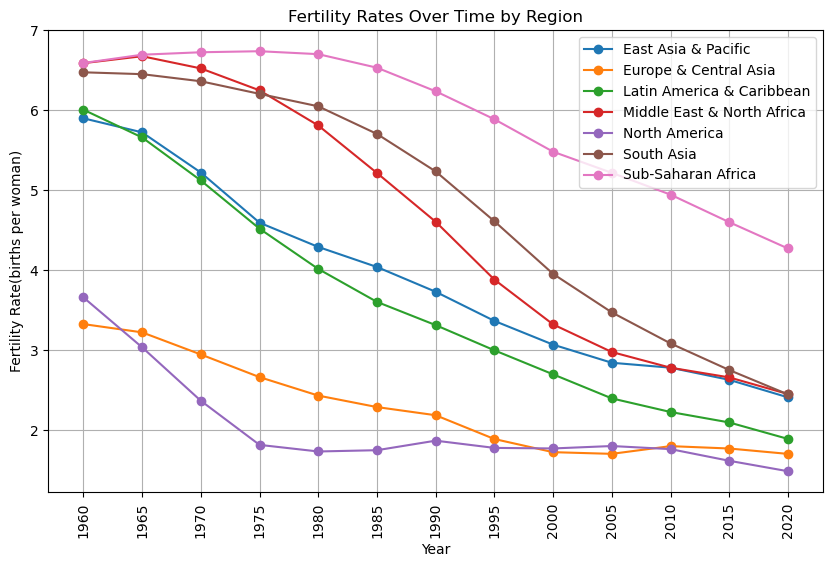

In [275]:
Years_to_plot = ['1960', '1965', '1970', '1975', '1980', '1985', '1990', '1995', '2000', '2005', '2010', '2015', '2020']
# Plotting
plt.figure(figsize=(10, 6))

# Defining a color cycle for consistency
color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Iterate over regions and plot a line for each
for i, region in enumerate(df_t.columns):
    color = color_cycle[i % len(color_cycle)]  # Cycle colors
    plt.plot(Years_to_plot, df_t.loc[Years_to_plot, region], label=region, color=color,marker='o')

plt.title('Fertility Rates Over Time by Region')
plt.xlabel('Year')
plt.ylabel('Fertility Rate(births per woman)')
plt.legend(df_t.columns)  # Use df_t.columns as labels for the legend
plt.grid(True)
plt.xticks(rotation='vertical')
plt.show()


In [158]:
#Selecting all rows with certain indicator code from the column
selected_rows3 = df3[df3['Indicator Code'] == 'SM.POP.NETM']
#merging two dataframe to create a new one
merged_df2 = pd.merge(df1,selected_rows3,on='Country Name')
merged_df2

,Country Code_x,Country Name,Official Name,2-alpha code,Currency,Region,Income Group,External Debt Status,Latest population census,Latest household survey,Latest Income and Expenditure data,Country Code_y,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
0,ABW,Aruba,Aruba,AW,Aruban florin,Latin America & Caribbean,High income,NaN,2020,<NA>,<NA>,ABW,Net migration,SM.POP.NETM,0.00,-569.00,-609.00,-646.00,-684.00,-726.00,-761.00,-1175.00,-1219.00,-1256.00,-1280.00,-1296.00,-552.00,-314.00,-247.00,-281.00,-690.00,-710.00,-727.00,-734.00,-737.00,-551.00,-411.00,-399.00,-536.00,-746.00,-946.00,-1049.00,-899.00,-185.00,879.00,1946.00,1294.00,1662.00,1668.00,1598.00,1636.00,1656.00,1786.00,1828.00,1235.00,560.00,350.00,324.00,315.00,579.00,569.00,621.00,666.00,703.00,498.00,315.00,229.00,134.00,88.00,177.00,170.00,218.00,367.00,412.00,0.00,501.00,164.00,157.00,150.00,144.00,138.00,132.00,126.00,121.00,116.00,111.00,106.00,102.00,97.00,93.00,89.00,85.00,82.00,78.00,75.00,71.00,68.00,65.00,62.00,59.00,56.00,54.00,54.00,54.00,54.00
1,AFG,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,South Asia,Low income,Estimate,1979,2015,2016,AFG,Net migration,SM.POP.NETM,2606.00,6109.00,7016.00,6681.00,7079.00,10695.00,3563.00,6824.00,3333.00,2029.00,4458.00,-12801.00,-4050.00,-3030.00,-20009.00,-44418.00,-85430.00,-83115.00,-117186.00,-481199.00,-1205401.00,-2127145.00,-586943.00,-192869.00,322022.00,-210572.00,-427073.00,-402606.00,-89837.00,2683.00,-666001.00,39926.00,1834556.00,1171818.00,665410.00,71824.00,27194.00,6129.00,35740.00,85758.00,-1007135.00,-192286.00,1327074.00,388632.00,-248616.00,252185.00,62684.00,-942887.00,221000.00,-58881.00,-141355.00,418796.00,105905.00,48076.00,255611.00,-281739.00,-90238.00,-47090.00,-47205.00,-8082.00,166821.00,-183672.00,-65846.00,-65846.00,-65846.00,-65846.00,-65846.00,-65846.00,-65912.00,-65224.00,-64185.00,-63146.00,-62458.00,-62355.00,-62355.00,-62356.00,-62356.00,-62356.00,-62354.00,-62336.00,-62305.00,-62268.00,-62230.00,-62193.00,-62144.00,-62091.00,-62044.00,-62015.00,-62011.00,-62011.00,-62011.00
2,AGO,Angola,People's Republic of Angola,AO,Angolan kwanza,Sub-Saharan Africa,Lower middle income,Actual,2014,2015,2008,AGO,Net migration,SM.POP.NETM,-43749.00,-49186.00,-54566.00,-59777.00,-71948.00,-87288.00,-104955.00,-113780.00,-111222.00,-81748.00,-36455.00,3219.00,35014.00,40182.00,39146.00,38725.00,35245.00,44937.00,45001.00,47175.00,53078.00,52138.00,55830.00,61000.00,57744.00,54953.00,47774.00,46192.00,47815.00,46755.00,47663.00,33925.00,39196.00,38883.00,45272.00,40855.00,45356.00,49960.00,51856.00,51687.00,53527.00,56959.00,60505.00,59438.00,66585.00,64009.00,70170.00,73940.00,73804.00,77265.00,90016.00,94709.00,96056.00,91528.00,84532.00,74170.00,91623.00,77733.00,61632.00,58986.00,7557.00,29089.00,-1000.00,-1000.00,-1000.00,-1000.00,-1000.00,-1000.00,-1000.00,-1000.00,-1000.00,-1000.00,-1000.00,-1000.00,-1000.00,-1000.00,-1000.00,-1000.00,-1000.00,-1000.00,-1000.00,-1000.00,-1000.00,-1000.00,-1000.00,-1000.00,-1000.00,-1000.00,-1000.00,-1000.00,-1000.00
3,ALB,Albania,Republic of Albania,AL,Albanian lek,Europe & Central Asia,Upper middle income,Actual,2020,2017,2012,ALB,Net migration,SM.POP.NETM,15540.00,15424.00,15288.00,15007.00,14612.00,14209.00,13747.00,13164.00,12504.00,11991.00,11102.00,10007.00,8796.00,7346.00,5834.00,3922.00,1646.00,-683.00,-3324.00,-6146.00,-9135.00,-12432.00,-15706.00,-19231.00,-23253.00,-27468.00,-32143.00,-37189.00,-42393.00,-48054.00,-52723.00,-56599.00,-59634.00,-61925.00,-63700.00,-65106.00,-65800.00,-65975.00,-65616.00,-

In [281]:
#creating a new dataframe grouprd by Region with columns_to_group
columns_to_group2 = ['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023', '2024', '2025', '2026', '2027', '2028', '2029', '2030', '2031',
       '2032', '2033', '2034', '2035', '2036', '2037', '2038', '2039', '2040',
       '2041', '2042', '2043', '2044', '2045', '2046', '2047', '2048', '2049',
       '2050']
region2 = merged_df2.groupby('Region') 
sum_region2 = region2[columns_to_group2].sum()
sum_region2

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
East Asia & Pacific,-134832.00,-279733.00,-325745.00,-308616.00,-226237.00,-247568.00,-234728.00,-214934.00,-59323.00,-43274.00,-35274.00,42437.00,-162559.00,-253311.00,-305986.00,-217766.00,-155609.00,47988.00,-88615.00,-254351.00,-157400.00,838.00,-66872.00,67188.00,-17299.00,37269.00,68922.00,14120.00,-120020.00,-405825.00,58287.00,-609709.00,-534564.00,-492467.00,-279271.00,-382094.00,-67872.00,-42379.00,52168.00,-169138.00,-426850.00,-447406.00,-431087.00,-538766.00,-434558.00,-488705.00,-284499.00,-149785.00,-181429.00,-66461.00,-38311.00,172750.00,221214.00,131693.00,1231.00,228713.00,411113.00,276790.00,62258.00,98884.00,157096.00,-58190.00,-231778.00,-230330.00,-230572.00,-229380.00,-229046.00,-230913.00,-228651.00,-229583.00,-229407.00,-227177.00,-226657.00,-226833.00,-228212.00,-229050.00,-229493.00,-228262.00,-228375.00,-228545.00,-228754.00,-227527.00,-227683.00,-227774.00,-227898.00,-228042.00,-227915.00,-227997.00,-228009.00,-228009.00,-228009.00
Europe & Central Asia,-25656.00,297312.00,368337.00,388892.00,385312.00,343912.00,448473.00,340810.00,282616.00,267211.00,-83205.00,471589.00,591562.00,555214.00,548548.00,308851.00,301656.00,220206.00,107886.00,129991.00,351266.00,13057.00,-146951.00,-34952.00,-13459.00,34624.00,164868.00,223161.00,241702.00,165998.00,117603.00,347312.00,-350854.00,-314175.00,-692450.00,-210109.00,-273276.00,-439656.00,-818446.00,-277330.00,451216.00,263461.00,1115521.00,1406483.00,1368669.00,1244382.00,1294992.00,1714261.00,1296080.00,867563.00,760829.00,756830.00,713040.00,510206.00,540314.00,786428.00,836289.00,926897.00,1065509.00,1197902.00,997915.00,990197.00,-219658.00,862786.00,807199.00,754364.00,685565.00,654849.00,646431.00,645026.00,645293.00,649498.00,650491.00,650575.00,648333.00,647115.00,646572.00,649209.00,648971.00,648589.00,648133.00,650549.00,650201.00,649985.00,649697.00,649369.00,649589.00,649405.00,649379.00,649379.00,649379.00
Latin America & Caribbean,-250700.00,-263354.00,-293908.00,-317580.00,-326134.00,-319894.00,-381072.00,-373515.00,-406323.00,-424984.00,-414606.00,-478773.00,-489702.00,-487589.00,-502031.00,-537409.00,-601006.00,-430294.00,-452787.00,-462514.00,-630156.00,-920228.00,-859407.00,-807280.00,-882175.00,-925590.00,-1029933.00,-1007193.00,-931262.00,-954794.00,-632926.00,-787287.00,-733641.00,-794866.00,-722576.00,-808888.00,-810859.00,-798314.00,-794188.00,-865570.00,-927860.00,-945054.00,-943234.00,-996723.00,-913056.00,-1026460.00,-996772.00,-964919.00,-991530.00,-910845.00,-539702.00,-443391.00,-437892.00,-480588.00,-434201.00,-348864.00,141429.00,535141.00,991836.00,560447.00,360583.00,250647.00,-474128.00,-483841.00,-446172.00,-387933.00,-327513.00,-282350.00,-256972.00,-238160.00,-219209.00,-201420.00,-190812.00,-187529.00,-186960.00,-186314.00,-185682.00,-183729.00,-183332.00,-182770.00,-182125.00,-180135.00,-179821.00,-179829.00,-179757.00,-179593.00,-179157.00,-179030.00,-179011.00,-179011.00,-179011.00
Middle East & North Africa,-59471.00,-126805.00,-92814.00,-127202.00,-108515.00,-117955.00,7254.00,29972.00,75457.00,77682.00,69215.00,77567.00,94436.00,124428.00,143615.00,512147.00,1229845.00,259532.00,-412659.00,267062.00,331406.00,255566.00,277682.00,365607.00,343812.00,126014.00,395343.00,220719.00,210515.00,347065.00,-1465821.00,643269.00,248310.00,668801.00,41830.00,64193.00,104939.00,129609.00,85039.00,108927.00,148437.00,55376.00,129989.00,-22789.00,189794.00,941972.00,1493140.00,172

In [282]:
df_2 = sum_region2 # Changing sum_region to df for easier means 
df_t2 = df_2.T # Transposing the dataframe to plot different regions along the x-axis (horizontal axis) and years along the y-axis (vertical axis) 
df_t2

Region,East Asia & Pacific,Europe & Central Asia,Latin America & Caribbean,Middle East & North Africa,North America,South Asia,Sub-Saharan Africa
1960,-134832.00,-25656.00,-250700.00,-59471.00,627919.00,44061.00,-149631.00
1961,-279733.00,297312.00,-263354.00,-126805.00,566007.00,-7357.00,-114785.00
1962,-325745.00,368337.00,-293908.00,-92814.00,576315.00,-4801.00,-140100.00
1963,-308616.00,388892.00,-317580.00,-127202.00,629644.00,-65871.00,-136582.00
1964,-226237.00,385312.00,-326134.00,-108515.00,560432.00,-101193.00,-97508.00
...,...,...,...,...,...,...,...
2046,-227915.00,649589.00,-179157.00,-22251.00,1277168.00,-1172670.00,-289894.00
2047,-227997.00,649405.00,-179030.00,-22251.00,1276984.00,-1172733.00,-289882.00
2048,-228009.00,649379.00,-179011.00,-22251.00,1276958.00,-1172741.00,-289880.00
2049,-228009.00,649379.00,-179011.00,-22251.00,1276958.00,-1172741.00,-289880.00


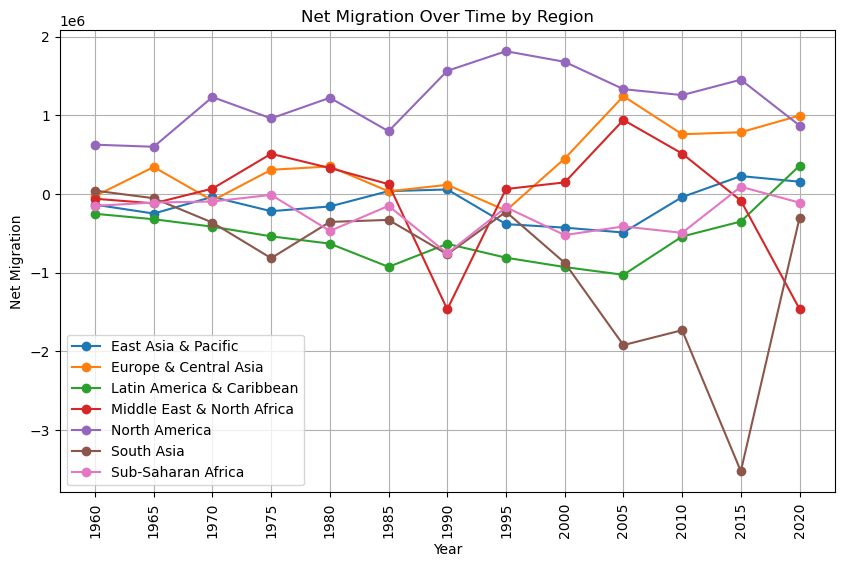

In [283]:
Years_to_plot2 = ['1960', '1965', '1970', '1975', '1980', '1985', '1990', '1995', '2000', '2005', '2010', '2015', '2020']
# Plotting
plt.figure(figsize=(10, 6))

# Defining a color cycle for consistency
color_cycle2 = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Iterate over regions and plot a line for each
for j, region2 in enumerate(df_t2.columns):
    color = color_cycle2[j % len(color_cycle2)]  # Cycle colors
    plt.plot(Years_to_plot2, df_t2.loc[Years_to_plot, region2], label=region2, color=color,marker='o')

plt.title('Net Migration Over Time by Region')
plt.xlabel('Year')
plt.ylabel('Net Migration')
plt.legend(df_t2.columns)  # Use df_t.columns as labels for the legend
plt.grid(True)
plt.xticks(rotation='vertical')
plt.show()

In [176]:
#Selecting all rows with certain indicator code from the column
selected_rows4 = df3[df3['Indicator Code'].isin(['SP.DYN.TFRT.IN', 'SP.DYN.CDRT.IN'])].copy()
#merging two dataframe to create a new one
merged_df3 = pd.merge(df1,selected_rows4,on='Country Name')
merged_df3.

,Country Code_x,Country Name,Official Name,2-alpha code,Currency,Region,Income Group,External Debt Status,Latest population census,Latest household survey,Latest Income and Expenditure data,Country Code_y,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
0,ABW,Aruba,Aruba,AW,Aruban florin,Latin America & Caribbean,High income,NaN,2020,<NA>,<NA>,ABW,"Death rate, crude (per 1,000 people)",SP.DYN.CDRT.IN,6.59,6.46,6.39,6.28,6.25,6.22,6.05,5.97,5.96,5.92,5.88,5.86,5.75,5.68,5.66,5.70,5.74,5.84,5.93,6.00,6.06,5.93,6.12,6.25,6.37,6.50,6.69,6.78,6.90,7.13,7.10,6.87,6.42,6.41,6.39,6.37,6.34,6.36,6.34,6.31,6.33,6.35,6.42,6.55,6.81,6.84,6.89,6.96,7.18,7.09,6.75,6.95,7.19,7.40,7.73,7.97,8.34,8.41,8.60,8.78,9.69,11.23,NaN,NaN,NaN,9.98,NaN,NaN,NaN,NaN,11.38,NaN,NaN,NaN,NaN,12.82,NaN,NaN,NaN,NaN,14.18,NaN,NaN,NaN,NaN,15.22,NaN,NaN,NaN,NaN,15.79
1,ABW,Aruba,Aruba,AW,Aruban florin,Latin America & Caribbean,High income,NaN,2020,<NA>,<NA>,ABW,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,4.82,4.66,4.47,4.27,4.06,3.84,3.62,3.42,3.23,3.05,2.91,2.79,2.69,2.61,2.55,2.51,2.47,2.45,2.42,2.41,2.39,2.38,2.36,2.35,2.34,2.33,2.32,2.31,2.29,2.27,2.30,2.31,2.28,2.23,2.12,2.19,2.15,2.14,1.96,1.87,1.90,1.83,1.76,1.75,1.68,1.78,1.91,1.93,1.94,1.92,1.94,1.96,2.03,2.12,2.15,1.97,1.95,1.84,1.59,1.49,1.32,1.18,NaN,NaN,NaN,1.19,NaN,NaN,NaN,NaN,1.23,NaN,NaN,NaN,NaN,1.27,NaN,NaN,NaN,NaN,1.31,NaN,NaN,NaN,NaN,1.34,NaN,NaN,NaN,NaN,1.37
2,AFG,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,South Asia,Low income,Estimate,1979,2015,2016,AFG,"Death rate, crude (per 1,000 people)",SP.DYN.CDRT.IN,31.92,31.35,30.84,30.36,29.87,29.39,28.87,28.40,27.89,27.40,26.88,26.36,25.84,25.30,24.77,24.24,23.72,23.18,23.88,24.80,24.21,23.61,25.62,25.11,30.03,29.66,23.70,23.29,19.95,19.05,18.45,17.95,17.22,14.84,14.69,14.09,13.63,13.33,13.56,12.46,12.10,11.71,11.28,10.70,10.28,9.94,9.68,9.36,8.83,8.54,8.25,7.93,7.71,7.48,7.39,7.33,7.08,7.03,6.98,6.79,7.11,7.34,NaN,NaN,NaN,5.99,NaN,NaN,NaN,NaN,5.59,NaN,NaN,NaN,NaN,5.37,NaN,NaN,NaN,NaN,5.31,NaN,NaN,NaN,NaN,5.36,NaN,NaN,NaN,NaN,5.49
3,AFG,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,South Asia,Low income,Estimate,1979,2015,2016,AFG,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,7.28,7.28,7.29,7.30,7.30,7.30,7.32,7.34,7.36,7.39,7.40,7.43,7.45,7.49,7.53,7.54,7.56,7.59,7.60,7.61,7.59,7.57,7.55,7.54,7.51,7.52,7.52,7.53,7.53,7.53,7.57,7.61,7.67,7.72,7.72,7.71,7.71,7.67,7.64,7.60,7.53,7.45,7.34,7.22,7.07,6.91,6.72,6.53,6.38,6.24,6.10,5.96,5.83,5.70,5.56,5.41,5.26,5.13,5.00,4.87,4.75,4.64,NaN,NaN,NaN,4.18,NaN,NaN,NaN,NaN,3.73,NaN,NaN,NaN,NaN,3.34,NaN,NaN,NaN,NaN,3.06,NaN,NaN,NaN,NaN,2.82,NaN,NaN,NaN,NaN,2.62
4,AGO,Angola,People's Republic of Angola,AO,Angolan kwanza,Sub-Saharan Africa,Lower middle income,Actual,2014,2015,2008,AGO,"Death rate, crude (per 1,000 people)",SP.DYN.CDRT.IN,26.66,27.48,27.21,26.91,26.58,26.20,25.92,25.58,25.19,24.82,24.41,23.91,23.44,23.00,22.61,22.88,22.84,22.57,22.23,21.94,21.71,21.46,21.25,21.98,21.79,21.58,21.43,22.93,22.39,22.16,21.99,20.48,21.63,21.41,20.35,18.83,18.64,18.37,19.11,18.70,18.29,17.79,17.27,15.80,15.15,14.50,13.94,13.13,12.48,11.79,11.18,10.63,10.03,9.61,9.18,8.83,8.55,8.24,7.99,7.81,7.82,8.01,NaN,NaN,NaN,7.16,NaN,NaN,NaN,NaN,6.81,NaN,NaN,NaN,NaN,6.56,NaN,NaN,NaN,NaN,6.38,NaN,NaN,NaN,NaN,6.28,NaN,NaN,NaN,NaN,6.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [245]:
#creating a new dataframe grouprd by Region with columns_to_group
columns_to_group3 = ['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023', '2024', '2025', '2026', '2027', '2028', '2029', '2030', '2031',
       '2032', '2033', '2034', '2035', '2036', '2037', '2038', '2039', '2040',
       '2041', '2042', '2043', '2044', '2045', '2046', '2047', '2048', '2049',
       '2050']
region3 = merged_df3.groupby('Indicator Name') 
sum_region3 = region3[columns_to_group3].mean()
sum_region3

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
Indicator Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Death rate, crude (per 1,000 people)",15.53,15.18,14.87,14.66,14.26,14.09,13.81,13.59,13.41,13.32,13.07,12.86,12.58,12.24,12.08,12.30,12.29,11.58,11.43,11.24,11.07,10.89,10.81,10.74,10.61,10.49,10.26,10.22,10.33,9.86,9.78,9.79,9.86,9.74,9.89,9.47,9.37,9.27,9.36,9.09,8.89,8.79,8.74,8.69,8.50,8.45,8.34,8.27,8.16,8.06,8.02,7.92,7.86,7.83,7.77,7.78,7.69,7.71,7.64,7.62,8.19,8.79,NaN,NaN,NaN,7.73,NaN,NaN,NaN,NaN,8.03,NaN,NaN,NaN,NaN,8.43,NaN,NaN,NaN,NaN,8.89,NaN,NaN,NaN,NaN,9.35,NaN,NaN,NaN,NaN,9.78
"Fertility rate, total (births per woman)",5.43,5.43,5.42,5.43,5.38,5.33,5.27,5.21,5.15,5.10,5.03,4.98,4.92,4.84,4.77,4.69,4.62,4.56,4.50,4.46,4.42,4.36,4.31,4.26,4.21,4.15,4.10,4.04,3.99,3.92,3.88,3.81,3.73,3.66,3.58,3.51,3.44,3.37,3.29,3.24,3.19,3.13,3.08,3.04,3.01,2.98,2.96,2.94,2.93,2.91,2.87,2.83,2.81,2.77,2.74,2.71,2.67,2.63,2.59,2.55,2.51,2.49,NaN,NaN,NaN,2.39,NaN,NaN,NaN,NaN,2.28,NaN,NaN,NaN,NaN,2.19,NaN,NaN,NaN,NaN,2.11,NaN,NaN,NaN,NaN,2.05,NaN,NaN,NaN,NaN,1.99


In [246]:
# Transposing the dataframe for easier plotting
df_t3 = sum_region3.T
df_t3

Indicator Name,"Death rate, crude (per 1,000 people)","Fertility rate, total (births per woman)"
1960,15.53,5.43
1961,15.18,5.43
1962,14.87,5.42
1963,14.66,5.43
1964,14.26,5.38
...,...,...
2046,NaN,NaN
2047,NaN,NaN
2048,NaN,NaN
2049,NaN,NaN


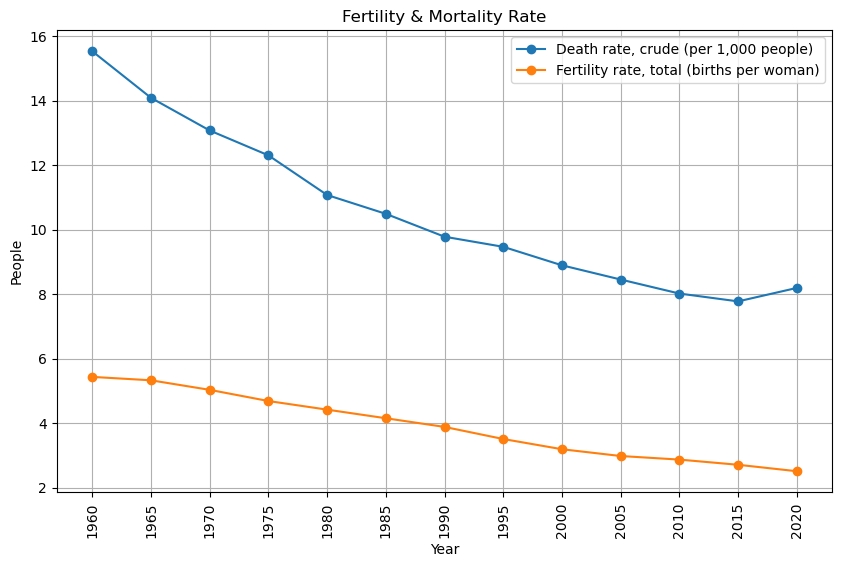

In [247]:
Years_to_plot2 = ['1960', '1965', '1970', '1975', '1980', '1985', '1990', '1995', '2000', '2005', '2010', '2015', '2020']
# Plotting
plt.figure(figsize=(10, 6))

# Defining a color cycle for consistency
color_cycle2 = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Iterate over regions and plot a line for each
for j, region2 in enumerate(df_t3.columns):
    color = color_cycle2[j % len(color_cycle2)]  # Cycle colors
    plt.plot(Years_to_plot2, df_t3.loc[Years_to_plot, region2], label='Indicator Name', color=color,marker='o')

plt.title('Fertility & Mortality Rate')
plt.xlabel('Year')
plt.ylabel('People')
plt.legend(df_t3.columns)  # Use df_t.columns as labels for the legend
plt.grid(True)
plt.xticks(rotation='vertical')
plt.show()

In [248]:
#disply all the coulumns of the dataframe
df_t3.columns[1]

'Fertility rate, total (births per woman)'

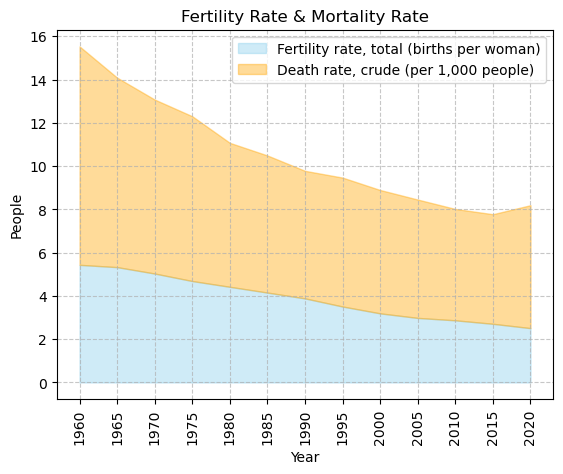

In [264]:
Years_to_plot2 = ['1960', '1965', '1970', '1975', '1980', '1985', '1990', '1995', '2000', '2005', '2010', '2015', '2020']
# Extracting relevant data for the years in 'Years_to_plot2'
y1 = df_t3.loc[df_t3.index.astype(str).isin(Years_to_plot2), df_t3.columns[1]]
y2 = df_t3.loc[df_t3.index.astype(str).isin(Years_to_plot2), df_t3.columns[0]]

# Create a stacked area chart
plt.fill_between(Years_to_plot2, 0, y1, color='skyblue', alpha=0.4, label='Fertility rate, total (births per woman)')
plt.fill_between(Years_to_plot2, y1, y2,color='orange', alpha=0.4, label='Death rate, crude (per 1,000 people)')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('People')
plt.title('Fertility Rate & Mortality Rate')
plt.xticks(rotation='vertical')

# Showing the legend
plt.legend()

# Adding grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Showing the plot
plt.show()


## Global Population Trends
    The world’s population is more than three times larger than it was in the mid-twentieth century. The global human population reached 8.0 billion in mid-November 2022 from an estimated 3.02 billion people in 1960, adding 1 billion people since 2010 and 2 billion since 1998. The world’s population is expected to increase by nearly 2 billion persons in the next 30 years, from the current 8 billion to 9.7 billion in 2050 and could peak at nearly 10.4 billion in the mid-2080s.
    
    On 15 November 2022, the world’s population reached 8 billion people, a milestone in human development. While it took the global population 12 years to grow from 7 to 8 billion, it will take approximately 15 years—until 2037— for it to reach 9 billion, a sign that the overall growth rate of the global population is slowing. Unbeknown to this like many I had also believed the fast growing population new and trends showed by the major medias. But this project had shown me some light on the true picture of the global population trends. It has shown how the population growth has become more slower compared to before and are projected to be slower too. From 1960 t0 1990 we have seen a popultion growth of estimated 2.25 billion people and estimated 2.52 billion people from 1990 to 2020 but it is only projected estimated 1.82 billion people from 2020 to 2050.
    
    From the EDA above we can come to know that the region like South Asia, Sub-Saharan Africa has been categorized in the lower middle income and lower income respectively. However we also able to see that these both region has the highest fertility rate(births per womans) of estimated 2.44 and 4.27 births per woman respectively. Also the net migration of this region could be the cause for the low income group as South Asia had one historic net migration of estimated -3 million in 2015. 
    
    However if we compare the Fertility rate(births per woman) and Mortality rate(per 1000 people) from the 1960 to 2020 there is a trend of decline in both of them. As of 2020 it has reached a estimated 2.5 births per woman and 8.19 deaths per 1000 people. It is almost a 46.04% and 52.7% decline in fertility rate and mortality rate respectively from 1960.
    
## Factors influencing the population growth
    -Fertility Rates
        Future population growth is highly dependent on the path that future fertility will take. According to the analysis, global fertility is projected to fall from 2.3 children per woman in 2020 to 2.1 in 2050.
    
    - Increasing longevity 
        Overall, significant gains in life expectancy have been achieved in recent years. Globally, life expectancy at birth is expected to rise from 72.8 years in 2019 to 77.2 years in 2050.  While considerable progress has been made in closing the longevity differential between countries, large gaps remain. In 2021, life expectancy at birth in the least developed countries lags 7 years behind the global average, due largely to persistently high levels of child and maternal mortality, as well as violence, conflict and the continuing impact of the HIV epidemic.
    
    - International migration
        International migration is a much smaller component of population change than births or deaths. However, in some countries and areas the impact of migration on population size is significant, namely in countries that send or receive large numbers of economic migrants and those affected by refugee flows. Between 2010 and 2021, seventeen countries or areas saw a net inflow of more than one million migrants, while ten countries saw a net outflow of similar magnitude. 


# Conclusion
    In conclusion, this EDA provides a comprehensive understanding of global population dynamics, dispelling misconceptions and shedding light on the multifaceted factors shaping population growth & our global trends. The insights gained contribute to informed discussions on future population trends and the intricate interplay of demographic variables on a global scale.